In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drug1.csv')

In [3]:
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.rename(columns = {'urlDrugName':'DrugName'}, inplace = True)

In [6]:
df.head()

,DrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DrugName       3107 non-null   object
 1   rating         3107 non-null   int64 
 2   effectiveness  3107 non-null   object
 3   condition      3106 non-null   object
 4   sideEffects    3107 non-null   object
dtypes: int64(1), object(4)
memory usage: 121.5+ KB


In [8]:
df.shape

(3107, 5)

There are 3107 rows and 5 columns

In [9]:
df[['DrugName','condition']].head(20)

,DrugName,condition
0,enalapril,management of congestive heart failure
1,ortho-tri-cyclen,birth prevention
2,ponstel,menstrual cramps
3,prilosec,acid reflux
4,lyrica,fibromyalgia
5,propecia,hair loss
6,vyvanse,add
7,elavil,depression
8,xanax,panic disorder
9,claritin,allergies


In [10]:
print('DrugName',df['DrugName'].unique())
print('rating',df['rating'].unique())
print('effectiveness',df['effectiveness'].unique())
print('condition',df['condition'].unique())
print('sideEffects',df['sideEffects'].unique())

DrugName ['enalapril' 'ortho-tri-cyclen' 'ponstel' 'prilosec' 'lyrica' 'propecia'
 'vyvanse' 'elavil' 'xanax' 'claritin' 'flagyl' 'dextroamphetamine'
 'sarafem' 'latisse' 'aldara' 'effexor-xr' 'neurontin' 'omnicef'
 'klonopin' 'dovonex' 'protopic' 'effexor' 'sotret' 'retin-a-micro'
 'lamotrigine' 'rebif' 'symbicort' 'lamictal' 'doxycycline' 'actonel'
 'provigil' 'ambien' 'wellbutrin' 'nortriptyline' 'imitrex' 'ativan'
 'prozac' 'topamax' 'levitra' 'oxycodone' 'oxycontin' 'vicodin' 'accutane'
 'zocor' 'minocycline' 'estrace' 'meridia' 'prevacid' 'cosopt' 'renova'
 'depakote' 'tekturna' 'zegerid' 'sular' 'crestor' 'metformin' 'celexa'
 'lexapro' 'naproxen' 'levoxyl' 'synthroid' 'spironolactone' 'oracea'
 'paxil' 'zantac' 'fosamax' 'tirosint' 'cymbalta' 'ambien-cr' 'angeliq'
 'prempro' 'wellbutrin-xl' 'biaxin' 'lipitor' 'tazorac' 'alendronate'
 'claripel-cream' 'valtrex' 'femring' 'soma' 'tylenol' 'ultram' 'chantix'
 'ziana' 'vivelle-dot' 'ultram-er' 'lotrel' 'viagra' 'seasonale'
 'wellbu

In [11]:
print('DrugName',df['DrugName'].nunique())
print('rating',df['rating'].nunique())
print('effectiveness',df['effectiveness'].nunique())
print('condition',df['condition'].nunique())
print('sideEffects',df['sideEffects'].nunique())

DrugName 502
rating 10
effectiveness 5
condition 1426
sideEffects 5


In [12]:
df['rating'].value_counts()

10    742
8     558
9     480
7     350
1     305
5     159
6     157
3     146
4     107
2     103
Name: rating, dtype: int64

There are ratings from 1-10

# CLEANING , VISUALIZATION AND PREPROCESSING

In [13]:
df.isna().sum()

DrugName         0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

There are only 1 missing value.

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

DrugName         0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

Now the missing values are removed

also strip leading and trailing white spaces from string type data. These white spaces often conceal the fact that there is nothing useful in the data cell simply because white spaces are data as well.

In [16]:
for col in df.columns:
    if df[col].dtype.kind == "O":
        df[col] = df[col].str.strip()

We have deleted the null values but there chance of having some missing values and blank spaces

In [17]:
def missing_values(df):
    """Returns a summary of missing values in df"""
    nrows = df.shape[0]
    data = []
    
    def pct(n, total):
        return round(n/total, 2)
    
    for col in df.columns:

        # string (Object) type columns
        if df[col].dtype.kind == "O":
            df[col] = df[col].str.strip()
            nulls = df[df[col] == ""][col].count()
            nulls += df[col].isnull().sum()

        # numerical (int) type columns
        elif df[col].dtype.kind == "i":
            nulls = df[col].isnull().sum()

        pctofnulls = pct(nulls, nrows)
        data.extend(
            [{"column": col, "pct": 1-pctofnulls, "num of records": nrows-nulls, "type": "not missing"},
             {"column": col, "pct": pctofnulls, "num of records": nulls, "type": "missing"}])
    
    return pd.DataFrame(data)

missing = missing_values(df)

In [18]:
import altair as alt

bars = (alt.Chart()
           .mark_bar(size=25, 
                     strokeWidth=1,
                     stroke="white",
                     strokeOpacity=0.7,
                     )
           .encode(x=alt.X("sum(num of records)",
                           axis=alt.Axis(title="number of records",
                                         grid=True)), 
                   y=alt.Y("column:O",
                           axis=alt.Axis(title="columns")),
                   tooltip=("column", "type", "num of records:Q",
                            alt.Tooltip("pct:Q", format=".1%")),
                   color=alt.Color("type",
                                   scale=alt.Scale(range=["#11043a", "#648bce"])))
           .properties(title="Missing Values"))

text = (alt.Chart()
           .mark_text(align="right",
                      dx=-1)
           .encode(x=alt.X("sum(num of records)", 
                           stack="zero"),
                   y=alt.Y("column"),
                   color=alt.Color("type",
                                   legend=None,
                                   scale=alt.Scale(range=["white"])),
                   text=alt.Text("pct", format=".0%")))

(alt.layer(bars, text, data=missing)
    .configure(background='#11043a')
    .configure_title(font="Arial",
                     fontSize=18,
                     color="#e6f3ff",
                     dy=-10)
    .configure_text(color="white")
    .configure_legend(titleFontSize=12,
                      titleColor="white",
                      tickCount=10,
                      titleOpacity=0.8,
                      labelColor="white",
                      labelOpacity=0.7,
                      titlePadding=10)
    .configure_axis(titleFontSize=13,
                    titlePadding=20,
                    titleColor="white",
                    titleOpacity=0.8,
                    labelFontSize=11,
                    labelColor="white",
                    labelOpacity=0.7,
                    tickOffset=0,
                    grid=False,
                    gridOpacity=0.15)
    .configure_view(strokeWidth=0)
    .resolve_scale(color='independent')
    .properties(height=300, width=680))

alt.LayerChart(...)

There are no missing values.

# Visualization

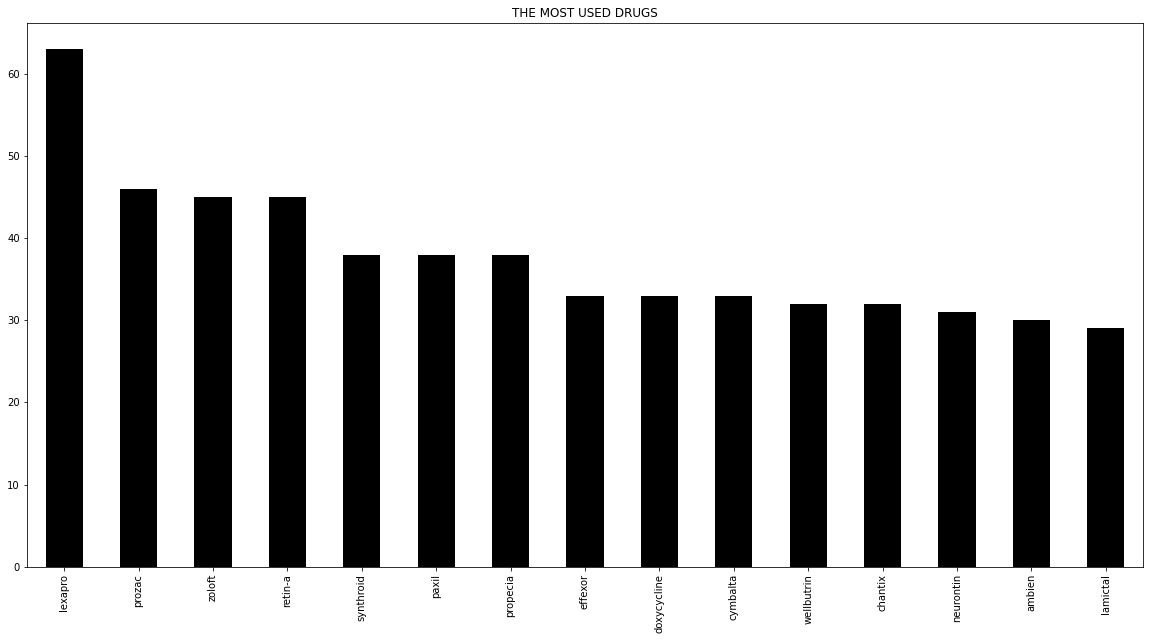

In [19]:
plt.subplots(figsize=(20,10))
df['DrugName'].value_counts().head(15).plot(kind='bar',color='black')
plt.title('THE MOST USED DRUGS')
plt.show()

Lexapro is the most used drug.

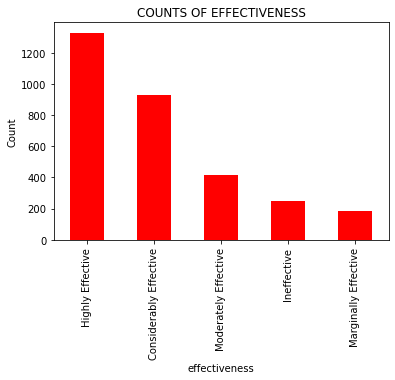

In [20]:
df['effectiveness'].value_counts().plot(kind='bar',color = 'red')
plt.xlabel('effectiveness')
plt.ylabel('Count')
plt.title('COUNTS OF EFFECTIVENESS')
plt.show()

Most drugs are highly effective.

In [21]:
df.columns

Index(['DrugName', 'rating', 'effectiveness', 'condition', 'sideEffects'], dtype='object')

In [22]:
df['condition'].value_counts()

depression                                          236
acne                                                165
anxiety                                              63
insomnia                                             54
birth control                                        49
                                                   ... 
herpes zoster                                         1
opiate dependence                                     1
glandular fever                                       1
nerve condition, burning in legs and aching feet      1
sinus allergy                                         1
Name: condition, Length: 1426, dtype: int64

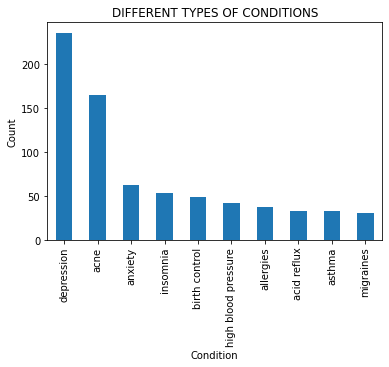

In [23]:
df['condition'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('DIFFERENT TYPES OF CONDITIONS')
plt.show()

Most of the patients use drugs for Depression.

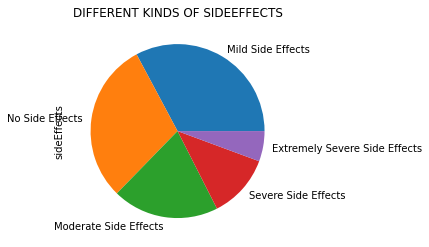

In [24]:
df['sideEffects'].value_counts().plot(kind='pie')
plt.title('DIFFERENT KINDS OF SIDEEFFECTS')
plt.show()

# Spitting the dataset

In [25]:
x = df.drop(['sideEffects'],axis=1)

In [26]:
y = df['sideEffects']

# Encoding

In [27]:
x.head()

,DrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


categorical values need to convert into numeric values

In [28]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
h=['DrugName','effectiveness','condition']
for i in np.arange(len(h)):
    x[h[i]] = label_en.fit_transform(x[h[i]]) 

In [29]:
x.head()

,DrugName,rating,effectiveness,condition
0,166,4,1,797
1,319,1,1,224
2,345,10,1,819
3,353,3,3,11
4,259,2,3,492


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3106 entries, 0 to 3106
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   DrugName       3106 non-null   int32
 1   rating         3106 non-null   int64
 2   effectiveness  3106 non-null   int32
 3   condition      3106 non-null   int32
dtypes: int32(3), int64(1)
memory usage: 84.9 KB


In [31]:
x.describe()

,DrugName,rating,effectiveness,condition
count,3106.000000,3106.000000,3106.000000,3106.000000
mean,269.499356,7.007727,1.301674,608.555055
std,147.264483,2.936681,1.315623,424.289999
min,0.000000,1.000000,0.000000,0.000000
25%,147.000000,5.000000,0.000000,236.000000
50%,280.000000,8.000000,1.000000,561.000000
75%,391.000000,9.000000,2.000000,951.000000
max,501.000000,10.000000,4.000000,1425.000000


In [32]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
y = label_en.fit_transform(y)

In [33]:
y

array([1, 4, 3, ..., 2, 1, 2])

# Scaling

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3106 entries, 0 to 3106
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   DrugName       3106 non-null   int32
 1   rating         3106 non-null   int64
 2   effectiveness  3106 non-null   int32
 3   condition      3106 non-null   int32
dtypes: int32(3), int64(1)
memory usage: 84.9 KB


In [35]:
from sklearn import preprocessing 
min_max = preprocessing.MinMaxScaler()
x = min_max.fit_transform(x)

In [36]:
x = pd.DataFrame(x, columns = ['DrugName','rating','effectiveness','condition'])

In [37]:
x.head()

,DrugName,rating,effectiveness,condition
0,0.331337,0.333333,0.25,0.559298
1,0.636727,0.000000,0.25,0.157193
2,0.688623,1.000000,0.25,0.574737
3,0.704591,0.222222,0.75,0.007719
4,0.516966,0.111111,0.75,0.345263


In [38]:
x.describe()

,DrugName,rating,effectiveness,condition
count,3106.000000,3106.000000,3106.000000,3106.000000
mean,0.537923,0.667525,0.325419,0.427056
std,0.293941,0.326298,0.328906,0.297747
min,0.000000,0.000000,0.000000,0.000000
25%,0.293413,0.444444,0.000000,0.165614
50%,0.558882,0.777778,0.250000,0.393684
75%,0.780439,0.888889,0.500000,0.667368
max,1.000000,1.000000,1.000000,1.000000


# Modeling

# Splitting dataset into training and test sets

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =0 ) 

In [40]:
X_train.shape

(2329, 4)

In [41]:
X_test.shape

(777, 4)

In [42]:
y_train.shape

(2329,)

In [43]:
y_test.shape

(777,)

# Supervised Machine Learning Models

# Logistic Regression

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
#To fit the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
#To predict
y_pred1 = lr.predict(X_test)
print('Predicted values are: ',y_pred1)

Predicted values are:  [3 3 1 1 1 2 1 4 3 4 1 2 3 3 2 1 1 1 3 4 4 1 4 3 1 1 2 3 3 3 3 1 1 1 1 1 4
 3 1 3 4 1 4 4 3 1 1 3 1 3 4 1 1 1 3 2 1 1 3 0 1 3 3 1 1 3 3 1 3 2 2 2 3 4
 4 1 2 2 4 1 4 1 1 1 1 1 3 3 3 1 1 1 3 1 3 4 4 3 1 1 1 2 1 2 3 3 4 1 0 0 3
 1 1 1 0 1 1 3 1 2 3 3 0 1 1 1 1 2 3 3 3 3 1 3 3 2 3 1 3 3 0 2 3 4 2 1 3 1
 3 1 1 1 3 1 3 3 1 1 2 1 3 3 1 2 3 1 2 1 3 1 1 2 3 3 1 3 1 4 1 3 1 3 4 3 4
 1 1 3 3 1 1 1 1 4 3 3 1 1 4 4 3 1 3 1 2 1 3 3 4 1 1 1 1 3 1 2 3 1 3 3 2 1
 4 1 2 1 3 1 3 3 1 1 3 1 3 4 4 2 2 3 1 2 3 1 1 2 1 1 4 3 1 3 3 3 1 3 1 3 2
 3 4 1 1 4 4 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 3 1 3 1 3 4 1 4 3 4 3 3 1 3 0 3
 3 4 2 2 3 3 4 3 4 1 2 1 3 3 3 1 1 3 3 1 1 4 1 2 1 0 1 3 1 1 3 1 3 1 1 1 3
 1 1 1 2 1 3 3 3 2 1 1 3 3 1 1 3 1 1 3 3 3 3 4 3 4 1 3 2 3 1 1 1 1 1 1 3 0
 1 4 1 3 1 1 1 3 1 1 2 3 3 3 1 4 2 4 3 2 3 1 4 3 3 1 1 4 1 2 1 3 4 1 1 3 4
 3 3 4 4 1 3 2 1 3 1 1 3 4 1 1 3 1 3 2 1 2 4 0 1 4 1 1 3 1 1 3 3 4 1 1 4 1
 1 1 1 3 2 1 1 3 1 1 3 3 4 1 3 1 3 4 3 1 1 2 2 3 4 3 1 4 3 3 1 3 3 2 1 3 4
 1

In [47]:
#To check the accuracy, precision score, confusion matrix, recall score, f1 score
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score , precision_score, f1_score

In [48]:
#Confusion Matrix
conf1=confusion_matrix(y_test,y_pred1)

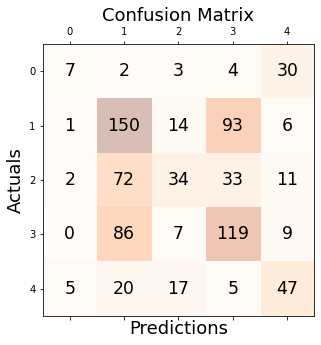

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf1, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf1.shape[0]):
    for j in range(conf1.shape[1]):
        ax.text(x=j, y=i,s=conf1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [50]:
a1=round(accuracy_score(y_test,y_pred1),3)
p1=round(precision_score(y_test, y_pred1,pos_label='positive',average='micro'),3)
r1=round(recall_score(y_test, y_pred1,pos_label='positive',average='micro'),3)
f1=round(f1_score(y_test, y_pred1,pos_label='positive',average='micro'),3)

In [51]:
d1={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a1,p1,r1,f1]}

In [52]:
pd.DataFrame(d1)

,Metric,Value
0,Acccuracy Score,0.459
1,Precision Score,0.459
2,Recall Score,0.459
3,F1 Score,0.459


# Support Vector Machine

In [53]:
# To fit the model
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [54]:
#To predict
y_pred3 = svc.predict(X_test)
print('Predicted values are: ',y_pred3)

Predicted values are:  [3 3 3 1 1 2 1 4 3 4 3 4 3 3 4 1 1 1 3 4 4 1 4 3 1 1 2 2 3 1 3 1 1 1 1 1 4
 3 1 3 4 1 4 4 3 1 1 3 1 3 4 1 1 1 3 2 1 1 3 4 1 3 3 1 1 3 3 1 3 2 2 2 3 4
 4 1 4 4 4 1 4 1 1 1 1 1 3 3 1 1 3 1 3 1 3 4 4 3 1 1 1 4 1 2 3 3 4 1 4 4 3
 1 1 1 4 1 1 3 1 4 3 3 4 1 1 1 1 2 3 3 3 3 3 3 3 2 1 1 3 3 4 4 3 4 2 1 3 1
 3 1 1 1 3 1 3 3 1 1 2 1 3 3 1 2 3 1 2 1 3 1 1 2 3 3 1 3 1 4 1 3 1 3 4 3 4
 1 1 3 3 1 1 1 1 4 1 3 1 3 4 4 3 1 3 1 2 1 3 3 4 1 1 1 1 3 1 2 3 1 3 3 2 1
 4 1 2 3 3 1 3 3 1 1 3 1 3 4 4 4 2 3 1 2 3 1 1 2 1 1 4 3 1 3 3 3 1 3 1 3 2
 1 4 1 1 4 4 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 3 1 3 1 3 4 1 4 3 4 3 3 1 3 4 3
 3 4 2 4 3 3 4 3 4 1 4 1 3 3 3 1 1 3 3 1 1 4 1 2 1 4 1 3 1 1 3 1 3 1 1 1 3
 1 1 1 4 1 3 3 3 4 1 1 3 3 1 1 3 1 1 3 3 3 3 4 3 4 1 3 2 3 1 1 1 1 2 1 3 4
 1 4 1 3 1 1 1 3 1 1 2 3 3 3 1 4 2 4 3 4 3 1 4 3 3 1 1 4 1 2 1 3 4 1 1 1 4
 3 3 4 4 1 3 4 1 3 1 1 1 4 1 1 1 1 3 2 1 2 4 4 1 4 1 1 3 1 1 1 3 4 1 1 4 3
 1 1 1 3 4 1 1 3 1 1 3 3 4 1 3 1 3 4 1 1 3 4 2 2 4 3 1 4 3 3 1 3 3 2 1 3 4
 1

In [55]:
#Confusion Matrix
conf3=confusion_matrix(y_test,y_pred3)

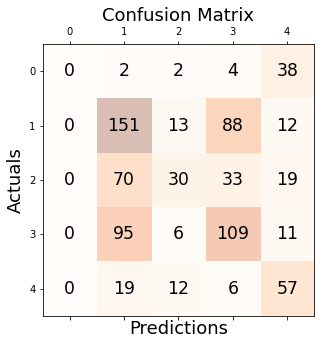

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf3, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf3.shape[0]):
    for j in range(conf3.shape[1]):
        ax.text(x=j, y=i,s=conf3[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [57]:
a3=round(accuracy_score(y_test,y_pred3),3)
p3=round(precision_score(y_test, y_pred3,pos_label='positive',average='micro'),3)
r3=round(recall_score(y_test, y_pred3,pos_label='positive',average='micro'),3)
f3=round(f1_score(y_test, y_pred3,pos_label='positive',average='macro'),3)

In [58]:
d3={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a3,p3,r3,f3]}

In [59]:
pd.DataFrame(d3)

,Metric,Value
0,Acccuracy Score,0.447
1,Precision Score,0.447
2,Recall Score,0.447
3,F1 Score,0.350


# KNN Classifier

In [60]:
#To check for which k value we have highest accuracy
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
  Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  Classifier.fit(X_train,y_train)
  y_pred2=Classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred2)
  acc_values.append(acc)

In [65]:
acc_values

[0.47104247104247104,
 0.45817245817245816,
 0.47876447876447875,
 0.47361647361647363,
 0.4839124839124839,
 0.49034749034749037,
 0.47104247104247104,
 0.47876447876447875,
 0.4800514800514801,
 0.4826254826254826,
 0.4671814671814672,
 0.46589446589446587]

Text(0, 0.5, 'accuracy')

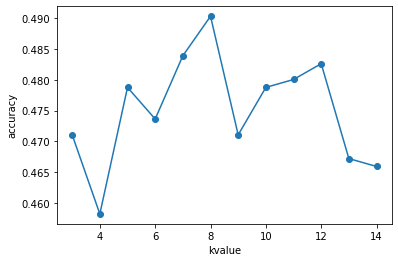

In [66]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('kvalue')
plt.ylabel('accuracy')

In [67]:
#To fit the model
knn = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [68]:
#To predict
y_pred2 = knn.predict(X_test)
print('Predicted values are: ',y_pred2)

Predicted values are:  [1 3 2 1 1 2 1 4 1 4 3 4 3 3 2 3 1 1 3 4 4 1 0 2 1 1 2 1 1 3 3 1 1 1 1 1 0
 3 1 1 4 1 0 4 3 1 1 3 1 3 4 2 1 1 3 4 1 1 3 0 1 3 1 1 1 3 3 3 1 1 1 1 1 0
 0 1 2 2 4 1 0 2 1 1 1 3 1 3 3 1 1 1 1 1 1 0 4 3 1 1 1 2 1 2 1 2 0 1 0 4 3
 1 1 1 0 1 1 3 1 4 3 3 0 3 1 3 1 2 3 3 3 3 1 3 1 2 1 3 3 3 4 4 3 0 4 3 3 1
 1 1 3 1 3 2 3 3 1 1 3 4 3 1 1 3 3 1 2 3 3 3 1 4 1 1 1 3 1 4 3 1 3 1 0 1 0
 1 3 1 2 1 1 1 1 4 3 1 2 3 2 4 1 2 1 2 2 3 3 3 0 2 1 1 1 3 2 3 1 1 3 3 2 1
 0 1 2 1 3 1 3 2 3 1 3 1 3 4 2 2 2 3 1 1 3 1 2 1 1 1 0 3 3 3 1 3 1 1 3 2 2
 3 4 1 3 4 0 0 3 1 1 1 1 1 1 4 1 1 1 1 1 2 3 1 3 2 3 4 1 0 1 4 3 3 1 1 0 3
 3 4 2 2 3 3 0 2 2 1 0 1 3 1 1 1 1 1 3 1 3 4 1 2 1 4 1 3 3 1 1 1 1 1 3 1 3
 2 2 1 2 2 3 1 1 2 1 1 3 1 2 3 2 1 1 3 1 2 3 0 3 4 1 3 3 1 2 1 2 1 2 2 3 4
 3 4 1 3 1 1 1 1 1 2 2 1 3 1 3 4 2 4 2 2 3 1 4 1 3 1 2 4 1 2 1 2 2 3 1 3 2
 3 2 0 4 1 1 2 1 1 3 1 1 4 1 1 1 1 1 4 3 2 4 4 1 4 1 1 3 2 1 3 1 2 1 2 0 1
 1 1 1 3 2 1 2 3 1 2 1 3 4 2 1 1 3 4 1 1 1 4 2 2 2 3 2 2 3 3 2 3 3 2 1 3 4
 2

In [69]:
#Confusion Matrix
conf2=confusion_matrix(y_test,y_pred2)

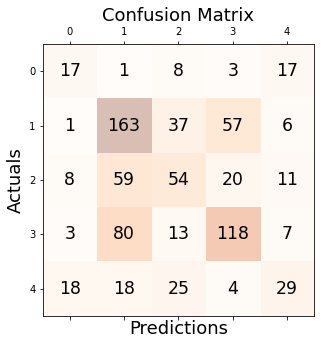

In [70]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf2, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf2.shape[0]):
    for j in range(conf2.shape[1]):
        ax.text(x=j, y=i,s=conf2[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [71]:
a2=round(accuracy_score(y_test,y_pred2),3)
p2=round(precision_score(y_test, y_pred2,pos_label='positive',average='micro'),3)
r2=round(recall_score(y_test, y_pred2,pos_label='positive',average='micro'),3)
f2=round(f1_score(y_test, y_pred2,pos_label='positive',average='micro'),3)

In [72]:
d2={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a2,p2,r2,f2]}

In [73]:
pd.DataFrame(d2)

,Metric,Value
0,Acccuracy Score,0.49
1,Precision Score,0.49
2,Recall Score,0.49
3,F1 Score,0.49


# Decision Tree Classifier

In [74]:
#To fit the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
#To predict
y_pred4 = dt.predict(X_test)
print('Predicted values are: ',y_pred4)

Predicted values are:  [3 1 2 2 3 2 3 0 4 0 3 4 3 1 2 3 1 1 3 4 4 2 1 2 2 1 4 1 3 3 3 1 3 2 2 3 4
 1 1 2 2 1 4 0 3 1 1 3 1 3 4 2 1 1 1 4 1 1 3 0 2 3 1 1 3 4 3 2 1 3 1 1 1 0
 4 2 1 2 4 3 2 2 1 1 3 1 1 3 3 3 2 2 1 2 4 0 4 3 2 1 3 3 1 4 1 2 2 1 0 4 3
 1 1 1 0 3 2 3 3 4 3 3 1 3 3 1 1 2 3 3 1 1 1 3 3 4 3 3 3 3 4 4 3 4 4 2 1 3
 3 1 1 3 3 2 1 1 1 1 4 2 3 1 1 3 3 1 1 4 3 3 4 2 1 3 2 3 1 0 1 2 1 3 0 2 0
 1 3 1 1 1 1 1 1 4 3 2 2 3 1 2 2 3 3 2 4 3 3 1 4 2 1 1 1 1 2 2 3 4 3 3 2 3
 0 1 1 3 3 3 3 2 1 3 3 3 3 4 1 2 2 3 2 4 3 1 1 1 1 1 4 1 3 3 2 1 1 1 3 1 1
 3 4 3 3 0 4 4 1 1 1 1 1 1 3 0 1 2 1 1 2 1 3 1 1 1 1 4 2 3 4 4 1 1 1 1 4 3
 1 4 2 2 1 3 2 2 0 1 4 4 3 2 1 1 3 1 1 1 1 2 3 2 2 4 1 3 3 3 1 1 1 1 1 3 1
 1 4 4 3 2 3 1 3 2 1 1 3 1 2 1 3 1 3 2 2 2 3 2 1 0 1 3 3 1 3 2 2 1 3 2 3 4
 3 4 2 3 1 1 2 1 1 2 1 1 3 3 1 2 2 4 3 3 1 2 1 3 1 2 1 4 1 1 3 1 0 3 0 1 3
 3 1 0 0 1 2 4 3 3 3 3 1 4 2 1 1 1 3 3 1 4 4 4 3 0 1 1 3 1 1 3 3 4 3 3 4 1
 1 1 1 3 1 3 2 3 1 1 1 3 4 2 3 1 3 0 2 3 1 4 4 3 2 3 1 2 1 1 1 3 3 1 1 3 0
 2

In [76]:
#Confusion Matrix
conf4=confusion_matrix(y_test,y_pred4)

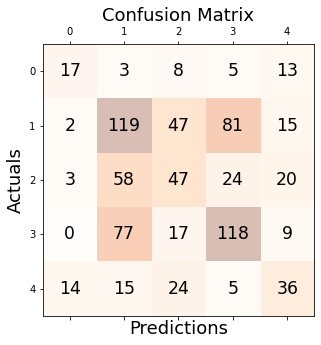

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf4, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf4.shape[0]):
    for j in range(conf4.shape[1]):
        ax.text(x=j, y=i,s=conf4[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [78]:
a4=round(accuracy_score(y_test,y_pred4),3)
p4=round(precision_score(y_test, y_pred4,pos_label='positive',average='macro'),3)
r4=round(recall_score(y_test, y_pred4,pos_label='positive',average='macro'),3)
f4=round(f1_score(y_test, y_pred4,pos_label='positive',average='macro'),3)

In [79]:
d4={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a4,p4,r4,f4]}

In [80]:
pd.DataFrame(d4)

,Metric,Value
0,Acccuracy Score,0.434
1,Precision Score,0.426
2,Recall Score,0.409
3,F1 Score,0.416


# Random Forest Classifier

In [81]:
#To fit the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
#To predict
y_pred5 = rf.predict(X_test)
print('Predicted values are: ',y_pred5)

Predicted values are:  [3 1 2 1 3 4 3 0 1 0 2 2 3 3 2 3 1 1 3 0 0 2 1 1 2 1 2 1 2 3 3 1 3 1 2 3 4
 1 1 3 4 3 4 0 3 1 1 3 1 3 0 2 1 1 1 2 1 1 3 0 2 3 1 3 3 3 3 3 3 3 1 1 1 0
 4 2 2 4 4 3 0 2 1 1 3 1 1 1 3 3 2 1 1 2 4 0 4 3 2 1 3 3 1 2 1 2 4 1 0 0 3
 1 1 1 0 3 2 3 3 4 3 3 0 3 3 1 1 2 1 3 3 1 1 3 1 4 3 3 3 3 4 4 3 4 4 2 1 3
 3 3 1 3 3 2 3 3 2 1 2 2 3 1 3 3 3 1 1 3 3 1 1 3 1 1 3 3 1 4 1 2 2 1 0 2 0
 1 3 1 1 1 1 2 3 4 3 1 2 3 1 2 2 2 3 2 4 3 3 1 0 2 3 1 1 3 2 2 3 1 1 1 2 3
 0 1 1 3 3 3 3 2 3 1 3 3 3 4 3 2 4 3 2 2 3 1 1 1 1 1 1 3 1 3 1 3 1 1 1 3 2
 3 4 3 3 0 0 4 3 1 1 1 1 1 3 4 1 2 1 3 2 2 3 1 3 2 1 4 2 4 1 4 1 1 1 1 0 3
 3 2 2 2 1 3 4 2 4 1 1 4 3 2 1 1 3 1 3 1 1 2 3 2 2 4 1 3 3 1 1 1 1 1 3 3 3
 2 2 2 4 2 3 1 3 4 3 1 3 1 2 1 1 1 3 2 3 2 3 2 3 0 1 3 3 1 3 2 4 1 3 2 3 4
 3 4 1 3 1 2 2 1 1 2 1 3 3 1 1 4 2 4 3 3 1 2 0 3 3 1 1 4 1 4 3 2 2 3 0 3 3
 3 2 0 4 1 2 4 3 3 3 1 1 4 2 1 2 1 1 4 3 2 4 4 1 0 2 1 3 1 1 3 3 4 3 3 4 1
 2 1 1 3 4 2 2 3 1 4 1 3 4 2 3 1 1 0 2 3 4 4 2 3 2 3 2 2 3 1 1 3 3 2 1 3 0
 2

In [83]:
#Confusion Matrix
conf5=confusion_matrix(y_test,y_pred5)

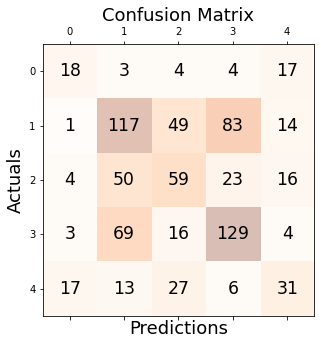

In [84]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf5, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf5.shape[0]):
    for j in range(conf5.shape[1]):
        ax.text(x=j, y=i,s=conf5[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [85]:
a5=round(accuracy_score(y_test,y_pred5),3)
p5=round(precision_score(y_test, y_pred5,pos_label='positive',average='micro'),3)
r5=round(recall_score(y_test, y_pred5,pos_label='positive',average='micro'),3)
f5=round(f1_score(y_test, y_pred5,pos_label='positive',average='micro'),3)

In [86]:
d5={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a5,p5,r5,f5]}

In [87]:
pd.DataFrame(d5)

,Metric,Value
0,Acccuracy Score,0.456
1,Precision Score,0.456
2,Recall Score,0.456
3,F1 Score,0.456


# Gradient Boosting

In [88]:
#To fit the model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [89]:
#To predict
y_pred6 = gb.predict(X_test)
print('Predicted values are: ',y_pred6)

Predicted values are:  [3 3 2 1 3 2 1 4 1 4 2 2 3 3 2 3 1 1 3 0 4 1 0 1 1 1 4 1 2 3 3 1 3 1 1 1 4
 3 2 2 4 1 4 0 3 1 1 3 1 3 4 1 1 1 3 2 1 1 1 0 1 3 1 1 1 3 3 1 3 3 2 2 1 0
 4 3 4 2 4 1 4 2 1 1 1 1 3 1 1 1 2 1 1 2 1 0 4 3 1 1 3 4 1 2 1 2 4 4 0 0 3
 3 1 3 0 1 3 3 1 2 1 3 0 3 3 3 1 2 1 3 3 1 1 3 1 2 3 3 3 3 0 4 3 4 4 2 1 3
 3 1 1 3 3 1 3 3 2 1 2 2 3 3 1 2 3 1 2 2 3 3 1 4 1 1 1 3 2 4 1 1 1 1 0 3 0
 2 3 3 1 1 1 1 1 4 1 3 2 1 4 4 1 1 3 2 1 3 3 3 0 1 1 3 1 3 2 2 3 1 3 3 2 1
 0 1 2 3 3 1 3 2 1 1 3 3 3 4 2 2 2 3 1 2 3 1 1 2 1 1 4 3 1 3 3 3 1 3 3 1 2
 1 4 1 3 0 4 4 3 1 1 1 1 1 1 4 1 2 1 2 1 1 3 1 3 2 3 2 1 4 1 4 3 3 1 3 0 3
 3 2 2 2 3 3 0 1 4 1 4 1 3 2 2 1 1 3 3 3 1 3 3 2 1 4 1 3 3 1 1 1 1 1 1 1 3
 1 2 2 4 1 3 1 3 2 1 1 3 1 1 1 3 3 1 2 1 2 3 2 3 0 1 3 3 2 1 1 1 1 1 1 3 0
 3 4 1 3 1 1 2 1 1 1 2 1 3 1 1 4 2 2 3 4 1 1 0 1 3 1 1 4 1 2 1 1 0 3 1 3 0
 3 1 0 4 1 1 2 3 1 3 1 1 4 1 1 2 1 1 4 3 2 4 4 1 0 1 1 3 1 1 3 3 4 3 2 4 1
 1 1 1 3 4 3 2 3 1 2 1 3 4 2 1 1 1 0 1 3 2 2 2 3 2 3 2 2 3 3 1 3 1 2 3 3 0
 2

In [90]:
#Confusion Matrix
conf6=confusion_matrix(y_test,y_pred6)

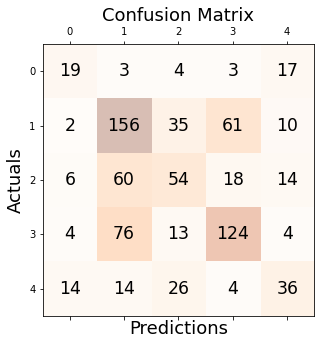

In [91]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf6, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf6.shape[0]):
    for j in range(conf6.shape[1]):
        ax.text(x=j, y=i,s=conf6[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [92]:
a6=round(accuracy_score(y_test,y_pred6),3)
p6=round(precision_score(y_test, y_pred6,pos_label='positive',average='micro'),3)
r6=round(recall_score(y_test, y_pred6,pos_label='positive',average='micro'),3)
f6=round(f1_score(y_test, y_pred6,pos_label='positive',average='micro'),3)

In [93]:
d6={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a6,p6,r6,f6]}

In [94]:
pd.DataFrame(d6)

,Metric,Value
0,Acccuracy Score,0.501
1,Precision Score,0.501
2,Recall Score,0.501
3,F1 Score,0.501


# Naive Bayes Classifier

In [95]:
#To fit the model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [96]:
#To predict
y_pred8 = gnb.predict(X_test)
print('Predicted values are: ',y_pred8)

Predicted values are:  [3 3 3 1 1 2 1 0 2 0 3 4 3 3 4 1 1 1 3 0 0 1 0 3 1 1 4 2 3 1 3 1 1 1 1 1 0
 3 3 3 4 1 0 4 3 1 1 3 1 3 4 1 1 1 3 2 1 1 3 0 1 3 3 1 1 3 3 1 3 2 2 2 1 0
 0 1 2 4 4 1 0 2 1 1 2 1 3 3 3 1 3 1 3 2 3 0 4 3 1 1 1 4 1 2 3 3 4 1 0 0 3
 1 1 1 0 1 1 3 1 4 3 3 0 1 1 1 1 2 3 3 3 3 1 3 3 2 3 1 3 3 0 4 3 0 2 3 3 1
 3 1 1 1 3 1 3 3 2 1 4 1 3 3 1 2 3 1 2 1 3 1 1 4 3 1 1 3 2 0 1 3 1 3 0 3 0
 1 1 3 3 1 2 1 1 4 1 2 1 1 0 0 3 1 3 1 2 1 3 3 0 1 1 3 1 3 1 2 3 1 3 3 2 1
 0 1 2 1 3 1 3 3 1 1 3 1 2 0 4 4 2 3 1 4 3 1 1 2 1 1 4 3 1 3 3 3 1 3 1 1 2
 1 2 2 1 0 0 0 1 1 1 1 1 1 1 0 2 1 2 1 1 1 3 1 3 1 3 4 1 0 2 2 3 3 1 3 0 3
 3 4 2 4 3 3 0 3 0 1 2 1 3 3 3 1 2 3 3 1 1 4 1 3 1 0 1 3 1 1 3 1 3 1 2 1 3
 1 1 1 4 1 3 3 3 4 1 1 3 3 1 1 2 1 1 3 3 3 3 4 3 0 1 3 2 3 2 1 1 1 2 2 3 0
 3 0 1 3 1 1 1 3 1 2 2 3 3 3 1 4 3 4 1 4 3 2 4 3 3 1 1 2 1 2 1 3 0 1 1 3 0
 3 3 0 0 1 3 4 1 3 1 1 1 4 1 1 3 1 3 4 1 2 4 0 1 0 1 1 3 1 1 3 3 4 3 1 0 3
 1 1 1 3 4 1 1 3 1 1 1 3 0 2 3 2 3 0 1 1 3 4 4 2 4 3 1 4 3 3 1 3 3 2 1 3 0
 1

In [97]:
#Confusion Matrix
conf8=confusion_matrix(y_test,y_pred8)

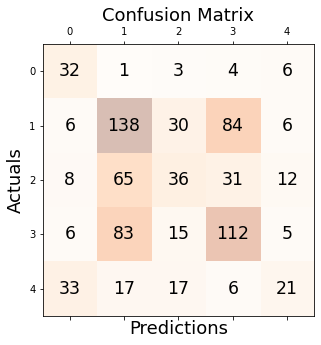

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf8, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf8.shape[0]):
    for j in range(conf8.shape[1]):
        ax.text(x=j, y=i,s=conf8[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [99]:
a8=round(accuracy_score(y_test,y_pred8),3)
p8=round(precision_score(y_test, y_pred8,pos_label='positive',average='micro'),3)
r8=round(recall_score(y_test, y_pred8,pos_label='positive',average='micro'),3)
f8=round(f1_score(y_test, y_pred8,pos_label='positive',average='micro'),3)

In [100]:
d8={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a8,p8,r8,f8]}

In [101]:
pd.DataFrame(d8)

,Metric,Value
0,Acccuracy Score,0.436
1,Precision Score,0.436
2,Recall Score,0.436
3,F1 Score,0.436


In [102]:
#To fit the model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [103]:
#To predict
y_pred9 = mnb.predict(X_test)
print('Predicted values are: ',y_pred9)

Predicted values are:  [1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1

In [104]:
#Confusion Matrix
conf9=confusion_matrix(y_test,y_pred9)

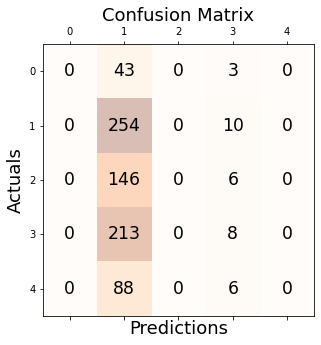

In [105]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf9, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf9.shape[0]):
    for j in range(conf9.shape[1]):
        ax.text(x=j, y=i,s=conf9[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [106]:
a9=round(accuracy_score(y_test,y_pred9),3)
p9=round(precision_score(y_test, y_pred9,pos_label='positive',average='micro'),3)
r9=round(recall_score(y_test, y_pred9,pos_label='positive',average='micro'),3)
f9=round(f1_score(y_test, y_pred9,pos_label='positive',average='micro'),3)

In [107]:
d9={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a9,p9,r9,f9]}

In [108]:
pd.DataFrame(d9)

,Metric,Value
0,Acccuracy Score,0.337
1,Precision Score,0.337
2,Recall Score,0.337
3,F1 Score,0.337


In [109]:
#To fit the model
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)

ComplementNB()

In [110]:
#To predict
y_pred10 = cnb.predict(X_test)
print('Predicted values are: ',y_pred10)

Predicted values are:  [3 3 3 1 1 3 3 4 4 4 3 4 3 3 4 1 1 3 1 4 4 1 4 3 1 1 4 4 3 1 1 1 1 3 1 1 4
 3 3 3 4 1 4 0 3 1 1 3 3 3 4 1 1 1 3 0 3 1 3 4 3 1 3 3 1 1 3 1 3 4 4 4 4 4
 4 3 1 4 0 3 4 4 1 1 4 3 1 3 1 1 3 1 3 4 3 4 0 1 3 1 1 4 3 3 3 3 4 1 4 4 1
 1 3 1 4 1 1 3 1 4 1 3 4 1 3 1 1 0 3 1 1 3 3 3 3 4 1 1 3 3 4 4 3 4 3 3 3 1
 1 1 1 1 3 1 3 3 4 1 4 1 3 1 1 4 3 3 1 3 3 1 3 4 3 3 3 3 4 4 1 3 1 3 4 3 4
 3 1 1 3 1 4 3 1 3 1 4 4 3 4 4 3 3 3 1 4 1 1 3 4 3 3 1 3 3 1 4 3 3 3 1 4 1
 4 1 4 3 3 1 1 3 3 3 3 1 4 4 4 4 4 3 3 4 1 3 1 4 1 3 4 3 1 1 3 3 1 3 1 3 4
 3 1 4 1 4 4 4 1 1 4 1 1 3 1 0 4 1 4 1 1 1 3 1 3 3 3 4 3 4 4 3 3 3 1 1 4 3
 1 3 1 4 3 3 4 3 4 3 4 4 3 3 3 3 4 3 3 1 1 3 1 4 1 0 1 3 1 1 3 1 3 1 4 1 3
 3 1 1 4 1 3 3 1 4 1 1 1 3 1 1 4 1 1 3 3 3 1 4 3 4 1 3 4 3 4 1 3 3 4 4 3 4
 1 4 1 1 1 1 3 3 1 4 4 3 3 3 3 4 3 4 4 4 3 4 4 3 3 3 1 1 1 3 1 3 4 3 1 1 4
 1 3 4 0 1 3 4 1 1 1 1 1 4 3 1 0 1 3 4 1 3 4 4 3 4 1 3 3 1 3 1 1 4 1 3 4 3
 3 3 1 1 4 1 1 3 4 1 4 3 4 4 3 4 3 4 3 3 3 4 4 4 4 3 4 4 3 3 1 1 3 3 1 3 4
 3

In [111]:
#Confusion Matrix
conf10=confusion_matrix(y_test,y_pred10)

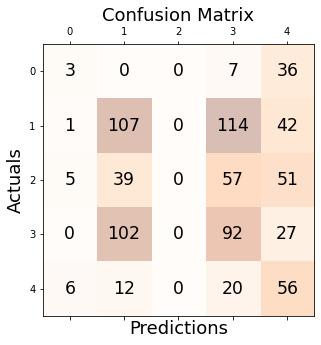

In [112]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf10, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf10.shape[0]):
    for j in range(conf10.shape[1]):
        ax.text(x=j, y=i,s=conf10[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [113]:
a10=round(accuracy_score(y_test,y_pred10),3)
p10=round(precision_score(y_test, y_pred10,pos_label='positive',average='micro'),3)
r10=round(recall_score(y_test, y_pred10,pos_label='positive',average='micro'),3)
f10=round(f1_score(y_test, y_pred10,pos_label='positive',average='micro'),3)

In [114]:
d10={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a10,p10,r10,f10]}

In [115]:
pd.DataFrame(d10)

,Metric,Value
0,Acccuracy Score,0.332
1,Precision Score,0.332
2,Recall Score,0.332
3,F1 Score,0.332


Highest accuracy is from Gradient Boosting classifier with 50.1%

# Fine Tuning of Hyperparameters

# Logistic Regression

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
lr_pipe = Pipeline([('lr', LogisticRegression())])
params = [{'lr__C': [1,5,9],
         'lr__solver': ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs'],
         'lr__penalty': ['l1','l2','elasticnet','none']}]
gs_lr = GridSearchCV(lr_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_lr.fit(X_train, y_train)
gs_lr.best_params_

{'lr__C': 5, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'}

In [117]:
lr=LogisticRegression(C=1 , solver='newton-cg', penalty='none')
lr.fit(X_train, y_train)

LogisticRegression(C=1, penalty='none', solver='newton-cg')

In [118]:
print ('F1 score is',f1_score(y_test,lr.predict(X_test),average='micro'))
print ('Accuracy  score is',accuracy_score(y_test,lr.predict(X_test)))

F1 score is 0.47361647361647363
Accuracy  score is 0.47361647361647363


Accuracy of logistic regression increased from 45.9% to 47.3% after tuning of hyperparameter

# SVM

In [127]:
svc=SVC(gamma='auto',random_state=42)
svc.fit(X_train,y_train)

SVC(gamma='auto', random_state=42)

In [128]:
accuracy_score(y_test,svc.predict(X_test))

0.46332046332046334

Accuracy increased form 44.7% to 46.3% after hyperparameter tuning.

# Decision Tree Classifier

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
dt_pipe = Pipeline([('dt', DecisionTreeClassifier())])
params = [{'dt__criterion': ['gini','entropy'],
         'dt__splitter': ['best', 'random'],
         'dt__max_depth': [2, 7,9]}]
gs_dt = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_dt.fit(X_train, y_train)
gs_dt.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 2, 'dt__splitter': 'best'}

In [130]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=9,splitter='best')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [133]:
print ('F1 score is',f1_score(y_test,dt.predict(X_test),average='micro'))
print ('Accuracy  score is',accuracy_score(y_test,dt.predict(X_test)))

F1 score is 0.4942084942084942
Accuracy  score is 0.4942084942084942


Accuracy increased from 43.1 to 49.4%

# Gradient Boosting Classifier

In [145]:
gb=GradientBoostingClassifier(max_depth=5)
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5)

In [146]:
y_pred=gb.predict(X_test)

In [147]:
accuracy_score(y_train,gb.predict(X_train))

0.862601975096608

Accuracy increased from 50.1% to 86.2%

# Result

Comparing all algorithms for classification, we can see that Gradient Boosting Algorithm is the best for predicting the side effect of the drugs,accuracy of predicted test values is 50.1%. After tuning, accuracy increased to 86.2%. 